# Snowfall animation in Python using PIL

Let's create a simple snowfall animation in Python using Python Imaging Library (PIL) [1]. The animation will consist of a sequence of frames where snowflakes of various sizes fall from the top of the screen at different speeds and rotate as they fall.

First, let's define the dimensions of a single static blank frame.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFont

In [2]:
# define the dimensions of the animation frame
WIDTH = 300   # frame width in pixels
HEIGHT = 300  # frame height in pixels

# define display and animation settings
DURATION = 10  # total animation duration in seconds
FPS = 50       # frames per second
BG_COLOR = (82, 129, 187)  # background color (R, G, B) - light blue 

# snowflake settings
FLAKE_CHAR = "*"               # character used to represent a snowflake
FLAKE_COLOR = (255, 255, 255)  # snowflake color - white
MAX_FLAKES = 100               # maximum number of snowflakes on screen

Let's visualize a single frame with a tiny snowflake placed in the center. The origin point (0, 0) is located at the top-left corner.

In [3]:
bgimg = Image.new("RGB", (WIDTH, HEIGHT), BG_COLOR)

draw = ImageDraw.Draw(bgimg)
draw.text((WIDTH//2, HEIGHT//2), FLAKE_CHAR, fill=FLAKE_COLOR, font_size=15)

bgimg.show()

Opening in existing browser session.


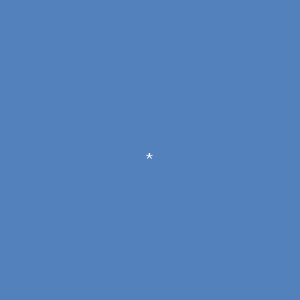

Since this animation will involve rendering many snowflakes, it's a good idea to create a dedicated class to represent a snowflake object. Each snowflake instance will store its own properties such as position on the frame, size, falling speed, rotation, and more. Let's outline how such a class might look.

Each snowflake will be initialized with randomized parameters and will fall downward at its assigned speed.

In [ ]:
x = np.random.randint(0, WIDTH)     # horizontal position
y = np.random.randint(-HEIGHT, 0)   # vertical position

speed_x = np.random.normal(0, 0.1)  # horizontal drift (pixels per frame)
speed_y = np.random.uniform(1, 3)   # falling speed (pixels per frame)

size = np.random.randint(5, 20)     # snowflake size (font size in pixels)

For each new frame, we will update the state of each snowflake. If a snowflake reaches the bottom of the frame, it will be reset to a new random position above the top, so it can fall again from the top of the screen.

In [ ]:
y += speed_y  # move down by vertical speed
x += speed_x  # apply horizontal drift

# if the snowflake moves below the frame, reset its position above the top
if y > HEIGHT:  
    x = np.random.randint(0, WIDTH)
    y = np.random.randint(-HEIGHT, 0)

Let's put everything together and create the final animation.

In [ ]:
# snowflake class
class Flake:
    def __init__(self):
        # snowflake settings
        self.x = np.random.randint(0, WIDTH)
        self.y = np.random.randint(-HEIGHT, 0)
        self.speed_x = np.random.normal(0, 0.1)
        self.speed_y = np.random.uniform(1, 3)
        self.size = np.random.randint(10, 22)
        self.font = ImageFont.load_default(size=self.size)

    def update(self):
        self.x += self.speed_x  # horizontal drift (wind effect)
        self.y += self.speed_y  # falling movement

        # reset position if the snowflake falls below the frame
        if self.y > HEIGHT:
            self.x = np.random.randint(0, WIDTH)
            self.y = np.random.randint(-HEIGHT, 0)

    def draw(self, draw):
        draw.text((self.x, self.y), FLAKE_CHAR, font=self.font, fill=FLAKE_COLOR)

# create animation frames
frames = []
flakes = [Flake() for _ in range(MAX_FLAKES)]

for _ in range(DURATION*FPS):
    bgimg = Image.new("RGB", (WIDTH, HEIGHT), BG_COLOR)
    draw = ImageDraw.Draw(bgimg)

    for flake in flakes:
        flake.update()
        flake.draw(draw)

    frames.append(bgimg)

# save as animated GIF
frames[0].save(
    "assets/02a-snowfall-animation-PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=int(1000/FPS),  # delay between frames (1000/50 = 20 milliseconds)
    loop=0,                  # loop indefinitely
)

This is our final animation. It runs for 10 seconds and loops indefinitely:

![](assets/02a-snowfall-animation-PIL.gif)

## 1&emsp;Snowflake Rotation

If we wanted to add rotation to each snowflake, we would need to modify the code. The `draw.text(...)` method from the `ImageDraw` module does not support text rotation directly. To achieve rotation, we would need to render the snowflake onto a separate image and rotate it using the `Image.rotate(...)` method instead.

In [14]:
# rotating snowflake class
class Flake():
    def __init__(self):
        # snowflake settings
        self.x = np.random.randint(0, WIDTH)
        self.y = np.random.randint(-HEIGHT, 0)
        self.speed_x = np.random.normal(0, 0.1)
        self.speed_y = np.random.uniform(1, 3)
        self.size = np.random.randint(10, 22)
        self.font = ImageFont.load_default(size=self.size)
        
        # rotation
        self.angle = np.random.randint(0, 360)
        self.speed_angular = np.random.randint(-5, 5)
        
        # approximate size of the character for canvas
        width, height = self.font.getmask(FLAKE_CHAR).size
        self.width = width
        self.height = height

    def update(self):
        self.x += self.speed_x  # horizontal movement (wind effect)
        self.y += self.speed_y  # falling movement
        self.angle += self.speed_angular  # flake rotation

        # reset position if the flake falls below the frame
        if self.y > HEIGHT:
            self.x = np.random.randint(0, WIDTH)
            self.y = np.random.randint(-HEIGHT, 0)

    def paste(self, bgimg):
        # create small transparent image for the flake
        flkimg = Image.new("RGBA", (2*self.width, 2*self.height), (255, 255, 255, 0))
        draw = ImageDraw.Draw(flkimg)

        # center the flake character roughly (adjusted for rotation)
        draw.text((self.width//2, -self.height//2), FLAKE_CHAR, font=self.font, fill=FLAKE_COLOR)
        
        # rotate the flake image and paste onto the background using alpha mask
        flkimg = flkimg.rotate(self.angle, resample=Image.BICUBIC)
        bgimg.paste(flkimg, (int(self.x), int(self.y)), mask=flkimg)

# create animation frames
frames = []
flakes = [Flake() for _ in range(MAX_FLAKES)]

for _ in range(DURATION*FPS):
    bgimg = Image.new("RGB", (WIDTH, HEIGHT), BG_COLOR)

    for flake in flakes:
        flake.update()
        flake.paste(bgimg)

    frames.append(bgimg)

# save as animated GIF
frames[0].save(
    "assets/02b-rotating-snowfall-animation-PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=1000 / FPS,  # delay between frames (1000/50 = 20 milliseconds)
    loop=0,               # loop indefinitely
)

<details>
<summary>📄 Click here to view the full code</summary>
```python
# rotating snowflake class
class Flake():
    def __init__(self):
        # snowflake settings
        self.x = np.random.randint(0, WIDTH)
        self.y = np.random.randint(-HEIGHT, 0)
        self.speed_x = np.random.normal(0, 0.1)
        self.speed_y = np.random.uniform(1, 3)
        self.size = np.random.randint(10, 22)
        self.font = ImageFont.load_default(size=self.size)
        
        # rotation
        self.angle = np.random.randint(0, 360)
        self.speed_angular = np.random.randint(-5, 5)
        
        # approximate size of the character for canvas
        width, height = self.font.getmask(FLAKE_CHAR).size
        self.width = width
        self.height = height

    def update(self):
        self.x += self.speed_x  # horizontal movement (wind effect)
        self.y += self.speed_y  # falling movement
        self.angle += self.speed_angular  # flake rotation

        # reset position if the flake falls below the frame
        if self.y > HEIGHT:
            self.x = np.random.randint(0, WIDTH)
            self.y = np.random.randint(-HEIGHT, 0)

    def paste(self, bgimg):
        # create small transparent image for the flake
        flkimg = Image.new("RGBA", (2*self.width, 2*self.height), (255, 255, 255, 0))
        draw = ImageDraw.Draw(flkimg)

        # center the flake character roughly (adjusted for rotation)
        draw.text((self.width//2, -self.height//2), FLAKE_CHAR, font=self.font, fill=FLAKE_COLOR)
        
        # rotate the flake image and paste onto the background using alpha mask
        flkimg = flkimg.rotate(self.angle, resample=Image.BICUBIC)
        bgimg.paste(flkimg, (int(self.x), int(self.y)), mask=flkimg)

# create animation frames
frames = []
flakes = [Flake() for _ in range(MAX_FLAKES)]

for _ in range(DURATION*FPS):
    bgimg = Image.new("RGB", (WIDTH, HEIGHT), BG_COLOR)

    for flake in flakes:
        flake.update()
        flake.paste(bgimg)

    frames.append(bgimg)

# save as animated GIF
frames[0].save(
    "assets/02b-rotating-snowfall-animation-PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=1000 / FPS,  # delay between frames (1000/50 = 20 milliseconds)
    loop=0,               # loop indefinitely
)
```
</details>

Here is the version with rotating snowflakes:

![](assets/02b-snowfall-animation-PIL.gif)

# 2&emsp;Depth Layers

In the next version, we simulate depth layers by assigning each snowflake a different opacity. Snowflakes that are farther away appear more transparent, creating a more realistic sense of depth and atmosphere.

In [ ]:
# rotating snowflake class with depth layers
class Flake():
    def __init__(self):
        # snowflake settings
        self.x = np.random.randint(0, WIDTH)
        self.y = np.random.randint(-HEIGHT, 0)
        self.depth = np.random.rand()
        self.speed_x = np.random.normal(0, 0.1)
        self.speed_y = 1 + 2 * self.depth
        self.size = int(10 + 12 * self.depth)
        self.opacity = int(100 + 155 * self.depth)
        self.font = ImageFont.load_default(size=self.size)
        
        # rotation
        self.angle = np.random.randint(0, 360)
        self.speed_angular = np.random.randint(-5, 5)
        
        # approximate size of the character for canvas
        width, height = self.font.getmask(FLAKE_CHAR).size
        self.width = width
        self.height = height

    def update(self):
        self.x += self.speed_x  # horizontal movement (wind effect)
        self.y += self.speed_y  # falling movement
        self.angle += self.speed_angular  # flake rotation

        # reset position if the flake falls below the frame
        if self.y > HEIGHT:
            self.x = np.random.randint(0, WIDTH)
            self.y = np.random.randint(-HEIGHT, 0)

    def paste(self, bgimg):
        # create small transparent image for the flake
        flkimg = Image.new("RGBA", (2*self.width, 2*self.height), (255, 255, 255, 0))
        draw = ImageDraw.Draw(flkimg)

        # center the flake character roughly (adjusted for rotation)
        draw.text((self.width//2, -self.height//2), FLAKE_CHAR, font=self.font, fill=FLAKE_COLOR+(self.opacity,))
        
        # rotate the flake image and paste onto the background using alpha mask
        flkimg = flkimg.rotate(self.angle, resample=Image.BICUBIC)
        bgimg.paste(flkimg, (int(self.x), int(self.y)), mask=flkimg)

# create animation frames
frames = []
flakes = [Flake() for _ in range(MAX_FLAKES)]

for _ in range(DURATION*FPS):
    bgimg = Image.new("RGB", (WIDTH, HEIGHT), BG_COLOR)

    for flake in flakes:
        flake.update()
        flake.paste(bgimg)

    frames.append(bgimg)

# save as animated GIF
frames[0].save(
    "assets/02c-rotating-snowfall-animation-depth-PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=1000 / FPS,  # delay between frames (1000/50 = 20 milliseconds)
    loop=0,               # loop indefinitely
)

Here is the result:

![](assets/02c-rotating-snowfall-animation-depth-PIL.gif)

# 3&emsp;Unicode Snowflakes

Next, let's try replacing the snowflake symbol with other Unicode characters. Since we will need Unicode symbols, it's important to load a font that supports these characters. I used the "Segoe UI Symbol" font family for this purpose, which contains various snowflake glyphs such as `❄`, `❅`, and `❆`.

In [17]:
# rotating snowflake class with unicode snowflake characters and depth layers
FLAKE_CHARS = ["❄", "❅", "❆"]

class Flake():
    def __init__(self):
        # snowflake settings
        self.x = np.random.randint(0, WIDTH)
        self.y = np.random.randint(-HEIGHT, 0)
        self.depth = np.random.rand()
        self.speed_x = np.random.normal(0, 0.1)
        self.speed_y = 1 + 2 * self.depth
        self.size = int(10 + 8 * self.depth)
        self.opacity = int(100 + 155 * self.depth)
        self.font = ImageFont.truetype(font="assets/seguisym.ttf", size=self.size)

        # rotation
        self.angle = np.random.randint(0, 360)
        self.speed_angular = np.random.randint(-5, 5)

        # approximate size of the character for canvas
        self.idx = np.random.randint(0, 3)
        width, height = self.font.getmask(FLAKE_CHARS[self.idx]).size
        self.width = width
        self.height = height

    def update(self):
        self.x += self.speed_x  # horizontal movement (wind effect)
        self.y += self.speed_y  # falling movement
        self.angle += self.speed_angular  # flake rotation

        # reset position if the flake falls below the frame
        if self.y > HEIGHT:
            self.x = np.random.randint(0, WIDTH)
            self.y = np.random.randint(-HEIGHT, 0)

    def paste(self, img):
        # create small transparent image for the flake
        flkimg = Image.new("RGBA", (2*self.width, 2*self.height), (255, 255, 255, 0))
        draw = ImageDraw.Draw(flkimg)

        # center the flake character roughly (adjusted for rotation)
        draw.text((self.width//2, 0), FLAKE_CHARS[self.idx], font=self.font, fill=FLAKE_COLOR+(self.opacity,))
        
        # rotate the flake image and paste onto the background using alpha mask
        flkimg = flkimg.rotate(self.angle, resample=Image.BICUBIC)
        bgimg.paste(flkimg, (int(self.x), int(self.y)), mask=flkimg)

# create animation frames
frames = []
flakes = [Flake() for _ in range(MAX_FLAKES)]

for _ in range(DURATION*FPS):
    bgimg = Image.new("RGB", (WIDTH, HEIGHT), BG_COLOR)

    for flake in flakes:
        flake.update()
        flake.paste(bgimg)

    frames.append(bgimg)

# save as animated GIF
frames[0].save(
    "assets/02d-rotating-snowfall-animation-unicode-depth-PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=1000 / FPS,  # delay between frames (1000/50 = 20 milliseconds)
    loop=0,               # loop indefinitely
)

Below is the updated version of our snowflake class, which randomly picks one of these symbols for each flake and keeps rotating it as it falls:

![](assets/02d-rotating-snowfall-animation-unicode-depth-PIL.gif)

## References
1. [Pillow (PIL Fork)](https://pillow.readthedocs.io/en/stable/) - Pillow is the friendly Python Imaging Library (PIL) fork
2. [How do I save an array of Pillow images as a GIF?](https://stackoverflow.com/questions/72945567/how-do-i-save-an-array-of-pillow-images-as-a-gif)
3. [PIL how to scale text size in relation to the size of the image](https://stackoverflow.com/questions/4902198/pil-how-to-scale-text-size-in-relation-to-the-size-of-the-image)
4. [Add and Rotate Text 45 Degrees PIL/Pillow](https://stackoverflow.com/questions/78287730/add-and-rotate-text-45-degrees-pil-pillow)
5. [Center-/middle-align text with PIL?](https://stackoverflow.com/questions/1970807/center-middle-align-text-with-pil)
6. [Snowflakes Unicode Symbols](https://www.alt-codes.net/snowflakes-symbols.php)
7. [Segoe UI Symbol](https://freefontsdownload.net/free-segoeuisymbol-font-135679.htm) font
8. [ChatGPT-4o](https://chat.openai.com/chat) - assistance with proofreading the text and code